# Regressions 2

### In this session, we will explore the World Happiness Report.

We will analyse those data to find relationships between the happiness score and economy, family, health, freedom, trust, perception of
corruption, generosity...

The dataset contains the following variables:

- Country : Country name
- Overall rank : Country ranking based on happiness score
- Score : Individual personal happiness rating from 0 to 10.
- GDP per capita : GDP per capita of each country in terms of purchasing power parity (PPP) (in USD)
- Social support : Individual rating that determines whether, when you have problems, your family or friends would help you. Binary responses (0 or 1).
- Healthy life expectancy : Healthy life expectancy at birth is based on data from the World Health Organization (WHO)
- Freedom to make life choices : Individual rating that determines whether you are atisfied or dissatisfied with your freedom to choose hat you do with your life. Binary responses (0 or 1).
- Generosity : Generosity is the residual from the regression of the national mean of responses to the question "Have you donated money to a charity in the last month?" on GDP per capita.
- Perceptions of corruption : Average of binary responses to two GWP questions: corruption in government and corruption in business.

### I) Data exploration

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula import api as smf

Open the csv "happiness_index_2019"

In [4]:
df=pd.read_csv('happiness_index_2019.csv')
df.columns = df.columns.str.replace(' ', '_')

Explore the dataset by using head function.

In [3]:
df.head(10)

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


Compute descriptive statistics using a Pandas function

In [4]:
df.describe()

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Plot variables that may have a positive correlation using matplotlib

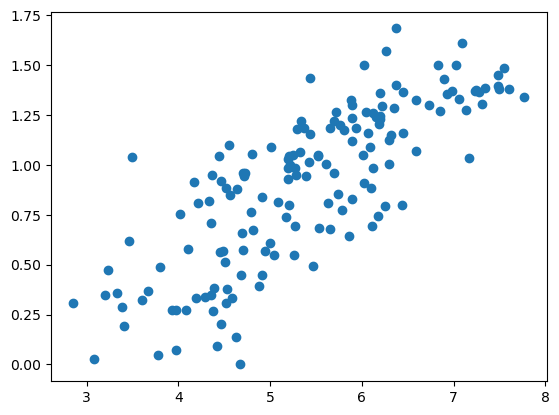

In [6]:
plt.plot(df['Score'],df['GDP_per_capita'],'o')

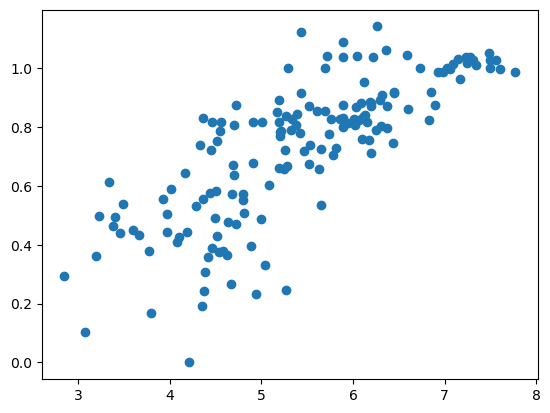

In [8]:
plt.plot(df['Score'],df['Healthy_life_expectancy'],'o')

Plot the correlation matrix of the main variables using heatmap function of Seaborn package. It should already be installed on your Nuvolos instance (use escpython kernel).

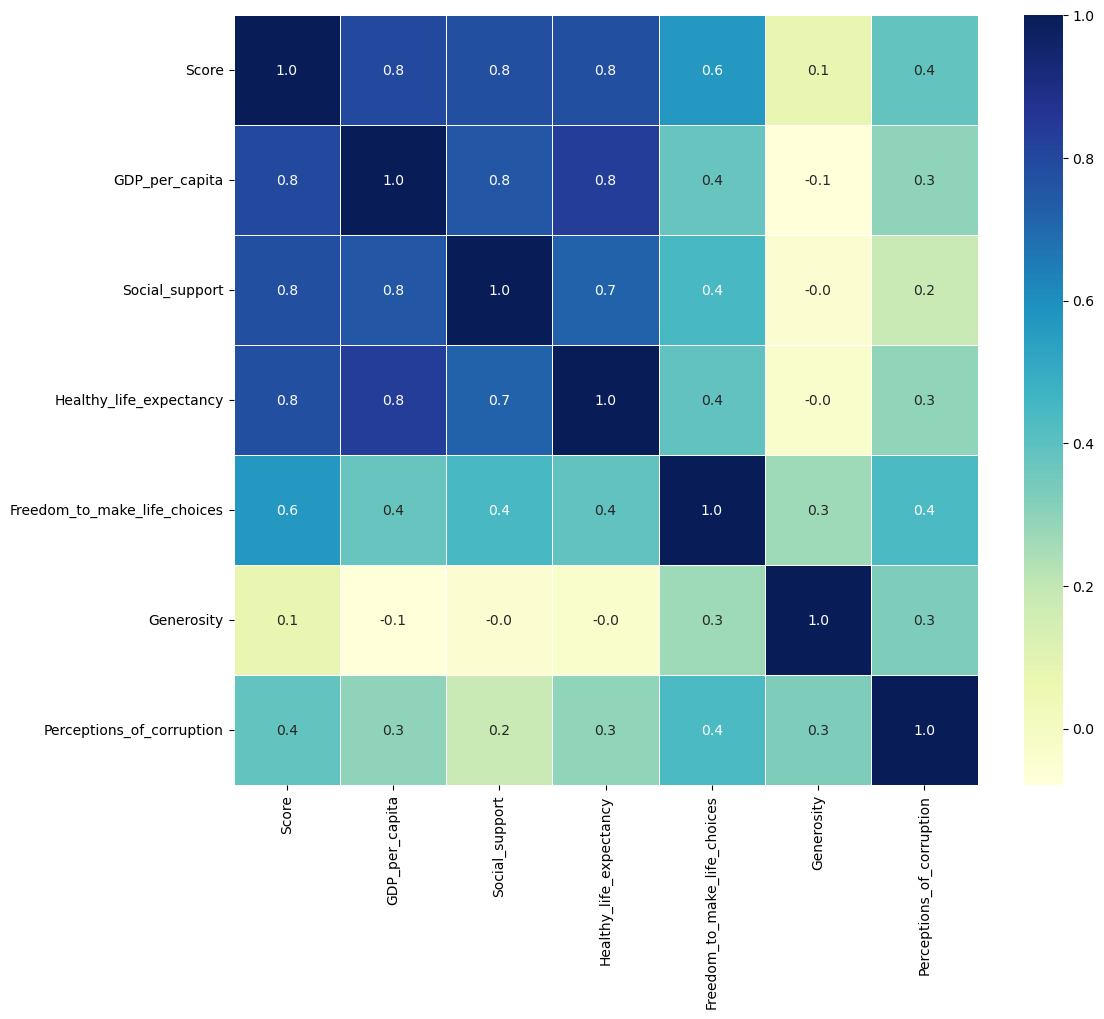

In [10]:
#Correlation Map

list1=["Score","GDP_per_capita","Social_support","Healthy_life_expectancy","Freedom_to_make_life_choices","Generosity","Perceptions_of_corruption"]
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df[list1].corr(), annot=True, cmap="YlGnBu", linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

From the above charts, we can obtain the following conclusions:

    The Happiness Score is highly related with the GDP per Capita, Social Support and Healthy Life Expectancy.
    The Happines Score is not related at all with the Generosity Variable.

So, as a first conclusion, we could say that the Happiest Countries will be the ones with higher GDP per capita, Social Support and Life Expectancy.

## II) Linear regression

## A) Simple linear regression

Perform various linear regressions to predict the Happiness score using one of the variables available in the dataset.

In [5]:
df.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [11]:
model_1 = smf.ols("Score ~ GDP_per_capita", df)
res_1 = model_1.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.5
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           4.32e-35
Time:                        11:00:56   Log-Likelihood:                -159.97
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3993      0.135     25.120      0.000       3.132       3.667
GDP_per_capita     2.2181      0.137     16.202      0.000       1.948       2.489
==============================================================================
Omnibus:                        1.139   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                1.244
Skew:                          -0.177   Prob(JB):                        0.537
Kurtosis:                       2.742   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model_1 = smf.ols("Score ~ GDP_per_capita + Healthy_life_expectancy + Freedom_to_make_life_choices", df)
res_1 = model_1.fit()

In [10]:
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     146.1
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.42e-44
Time:                        11:00:13   Log-Likelihood:                -131.75
No. Observations:                 156   AIC:                             271.5
Df Residuals:                     152   BIC:                             283.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.4201      0.167     14.519      0.000       2.091       2.749
GDP_per_capita                   1.1781      0.210      5.599      0.000       0.762       1.594
Healthy_life_expectancy          1.4578      0.348      4.189      0.000       0.770       2.145
Freedom_to_make_life_choices     2.1993      0.349      6.298      0.000       1.509       2.889
==============================================================================
Omnibus:                       11.927   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.394
Skew:                          -0.665   Prob(JB):                      0.00204
Kurtosis:                       3.369   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='GDP_per_capita', ylabel='Score'>

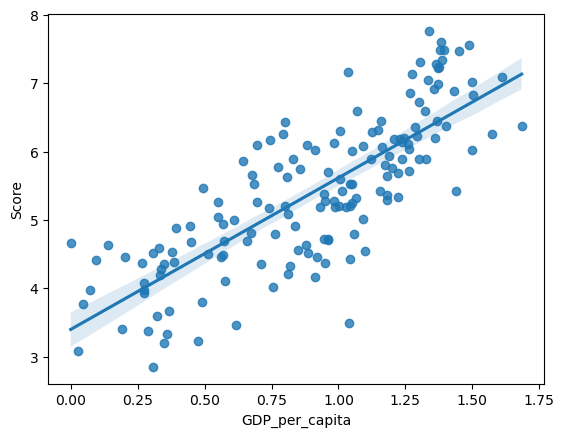

In [12]:
sns.regplot(x='GDP_per_capita', y='Score', data=df)

In [15]:
model_2 = smf.ols("Score ~ Healthy_life_expectancy", df)
res_2 = model_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     239.1
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           3.79e-33
Time:                        20:44:17   Log-Likelihood:                -164.48
No. Observations:                 156   AIC:                             333.0
Df Residuals:                     154   BIC:                             339.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.8068      0.177     15.837      0.000       2.457       3.157
Healthy_life_expectancy     3.5854      0.232     15.462      0.000       3.127       4.043
==============================================================================
Omnibus:                        6.324   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                3.543
Skew:                          -0.148   Prob(JB):                        0.170
Kurtosis:                       2.324   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='Healthy_life_expectancy', ylabel='Score'>

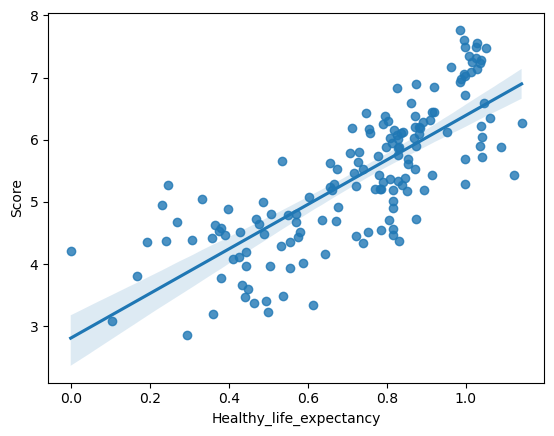

In [16]:
sns.regplot(x='Healthy_life_expectancy', y='Score', data=df)

## B) Multiple linear regression

### Multiple linear regression

In [17]:
model_3 = smf.ols("Score ~ Healthy_life_expectancy + Freedom_to_make_life_choices + GDP_per_capita +Social_support", df)
res_3= model_3.fit()
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     127.0
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           2.82e-47
Time:                        20:44:20   Log-Likelihood:                -122.62
No. Observations:                 156   AIC:                             255.2
Df Residuals:                     151   BIC:                             270.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.8921      0.199      9.491      0.000       1.498       2.286
Healthy_life_expectancy          1.1414      0.337      3.384      0.001       0.475       1.808
Freedom_to_make_life_choices     1.8458      0.340      5.423      0.000       1.173       2.518
GDP_per_capita                   0.8105      0.216      3.745      0.000       0.383       1.238
Social_support                   1.0166      0.235      4.331      0.000       0.553       1.480
==============================================================================
Omnibus:                        5.077   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                4.685
Skew:                          -0.413   Prob(JB):                       0.0961
Kurtosis:                       3.198   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### By comparing adjusted $R^2$, find the regression which explains best happiness.

### Polynomial regression 

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

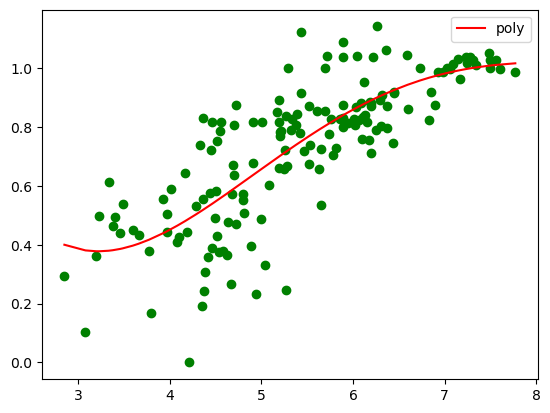

In [19]:
x=df.Score.values.reshape(-1,1)
y=df["Healthy_life_expectancy"].values.reshape(-1,1)
plt.scatter(df["Score"],df["Healthy_life_expectancy"],color="green")

polynomial_regression=PolynomialFeatures(degree=4)
x_polynomial=polynomial_regression.fit_transform(x)

#%% fit
linear_regression2=LinearRegression()
linear_regression2.fit(x_polynomial,y)

#%%
y_head2=linear_regression2.predict(x_polynomial)

plt.plot(x,y_head2,color="red",label="poly")
plt.legend()
plt.show()